In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['image.cmap'] = 'gray'

# Questão 1

In [2]:
img_1a = cv2.imread('exercicio/1a.bmp', 0)
img_1b = cv2.imread('exercicio/1b.bmp', 0)

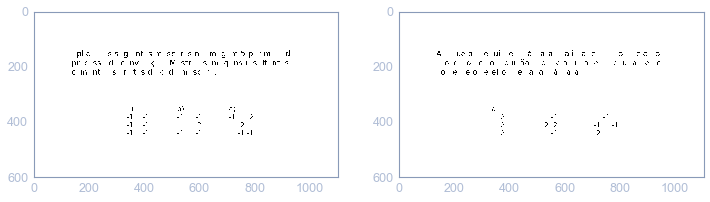

In [3]:
plt.subplot(121)
plt.imshow(img_1a)
plt.subplot(122)
plt.imshow(img_1b)
plt.show()

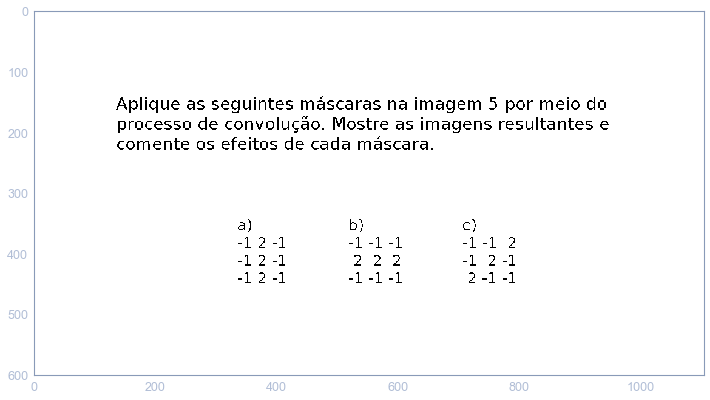

In [4]:
plt.imshow(cv2.bitwise_and(img_1a, img_1b));

In [5]:
img_5 = cv2.imread('exercicio/5.jpg', 0)

mask_a = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
mask_b = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
mask_c = np.array([[-1, -1, 2], [-1, 2, -1], [2, -1, -1]])

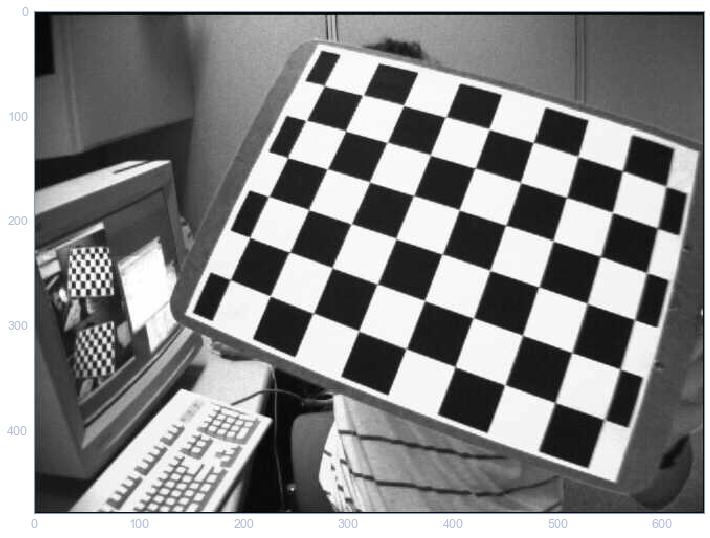

In [6]:
plt.imshow(img_5);

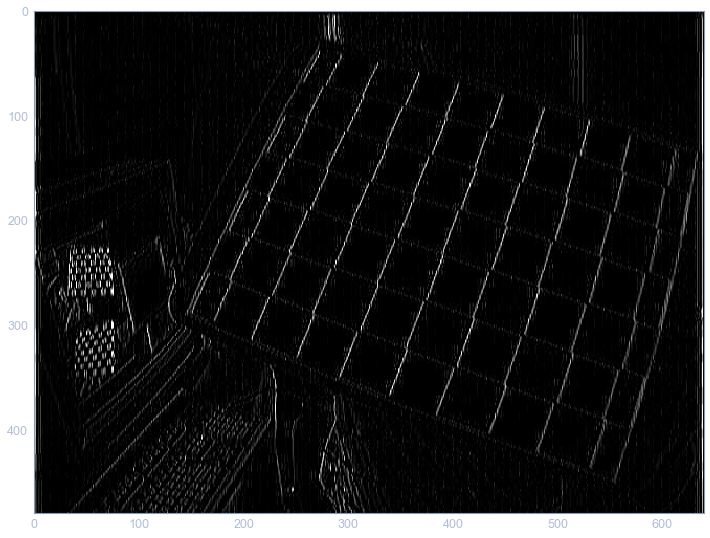

In [7]:
plt.imshow(cv2.filter2D(img_5, -1, mask_a));

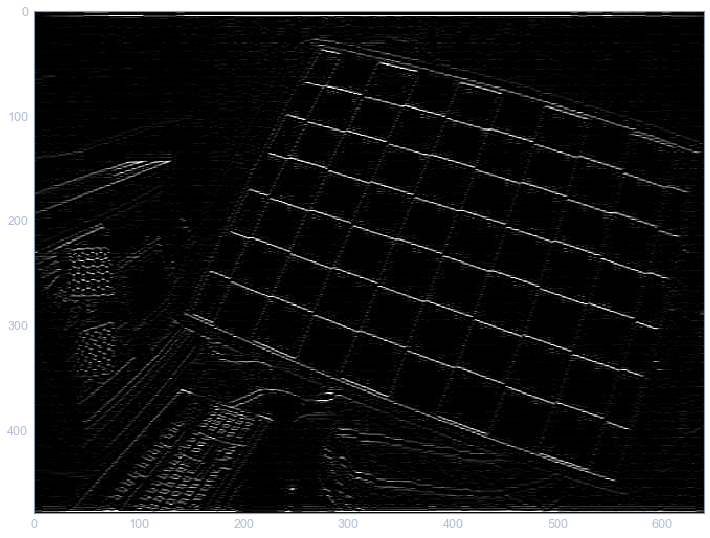

In [8]:
plt.imshow(cv2.filter2D(img_5, -1, mask_b));

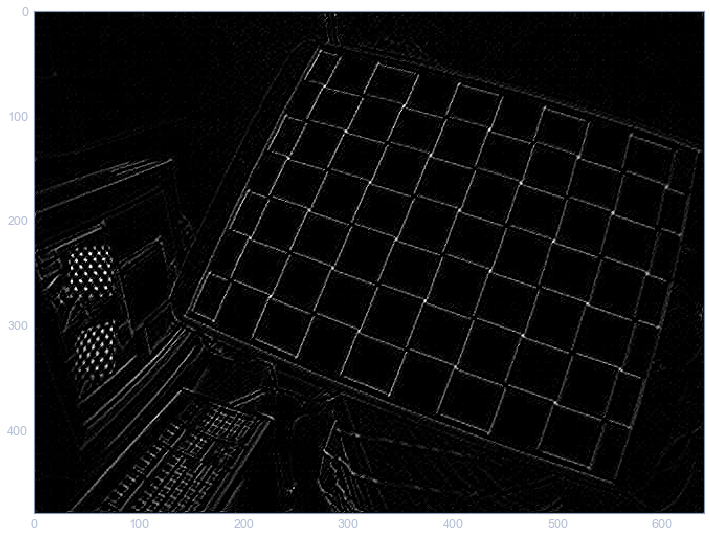

In [9]:
plt.imshow(cv2.filter2D(img_5, -1, mask_c));

# Questão 2

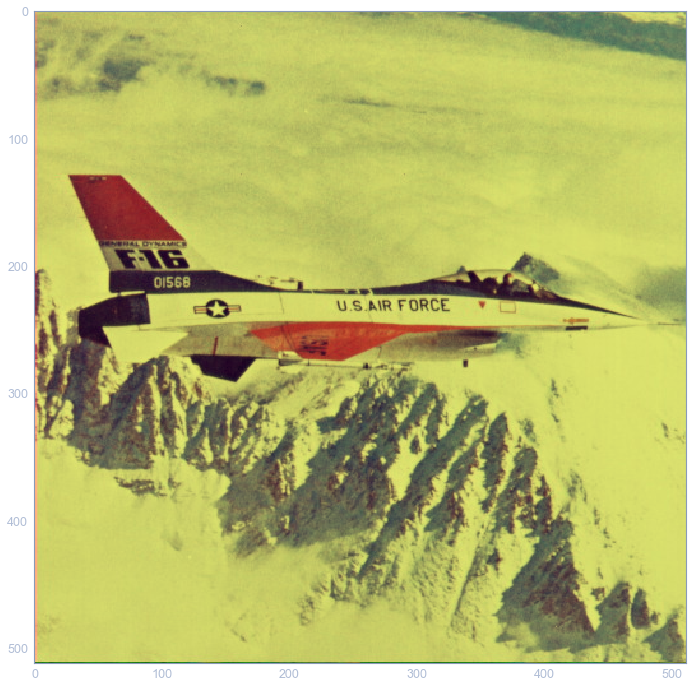

In [10]:
img_2 = cv2.imread('exercicio/2.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.normalize(img_2 * [2, 2, 1], None, 0, 255, cv2.NORM_MINMAX));

# Questão 3

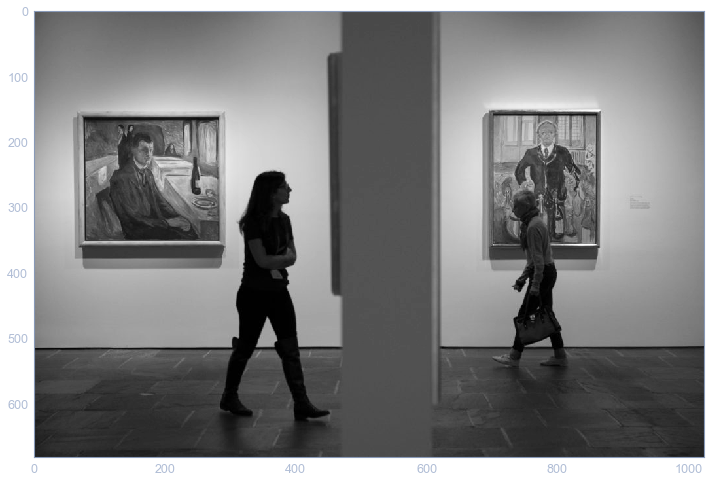

In [11]:
img_3 = cv2.imread('exercicio/3.jpg', 0)
plt.imshow(img_3);

In [12]:
img_3.shape

(683, 1024)

In [13]:
h = img_3.shape[0]
w = img_3.shape[1]

In [14]:
img_3[h//2:, :w//2] = cv2.equalizeHist(img_3[h//2:, :w//2])
img_3[:h//2, w//2:] = cv2.equalizeHist(img_3[:h//2, w//2:])

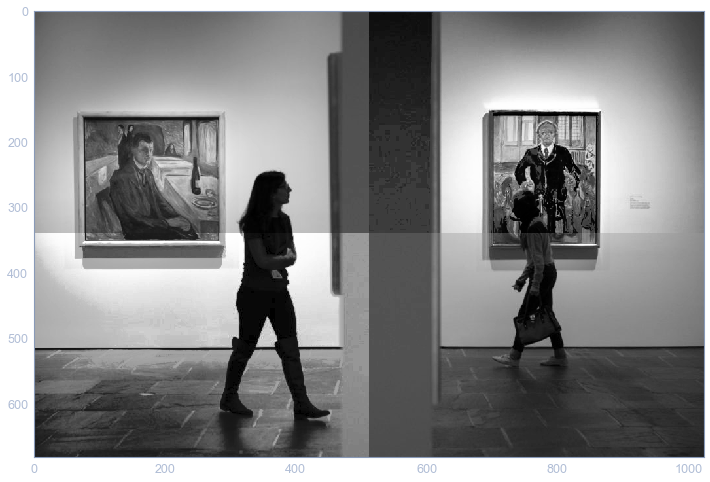

In [15]:
plt.imshow(img_3);

# Questão 4

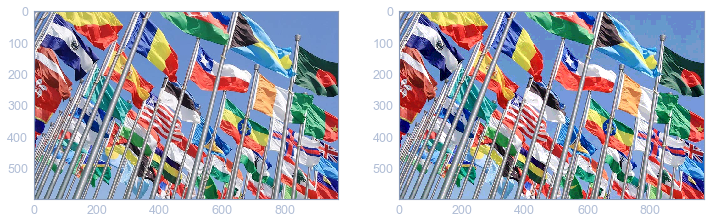

In [16]:
img_4 = cv2.imread('exercicio/4.jpg')
img_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB)

plt.subplot(121)
orig = cv2.normalize(img_4, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(orig)
plt.subplot(122)
conv = cv2.normalize((img_4 / 16).astype('uint8'), None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(conv)

plt.show()

In [17]:
np.unique((conv[:, :, 0])).shape, np.unique((orig[:, :, 0])).shape

((16,), (256,))

# Questão 5

In [18]:
n = 100
img_n = np.zeros((n, n))

In [19]:
img_n_fft = np.fft.fftshift(cv2.dft(np.float32(img_n), flags= cv2.DFT_COMPLEX_OUTPUT))
img_magnitude = cv2.magnitude(img_n_fft[:,:,0], img_n_fft[:,:,1])

In [20]:
img_magnitude[25, 25] = 255
img_magnitude[10, 0] = 255
img_magnitude[0, 10] = 255

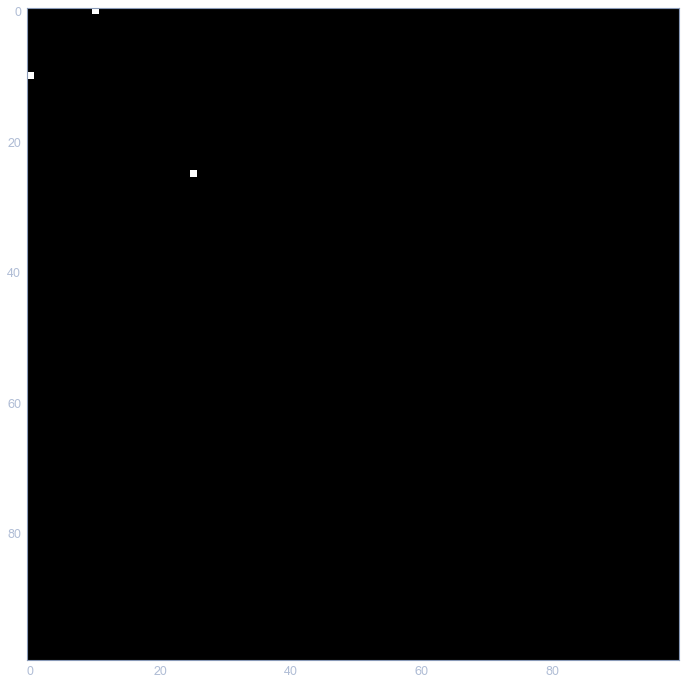

In [21]:
plt.imshow(img_magnitude, cmap='gray');

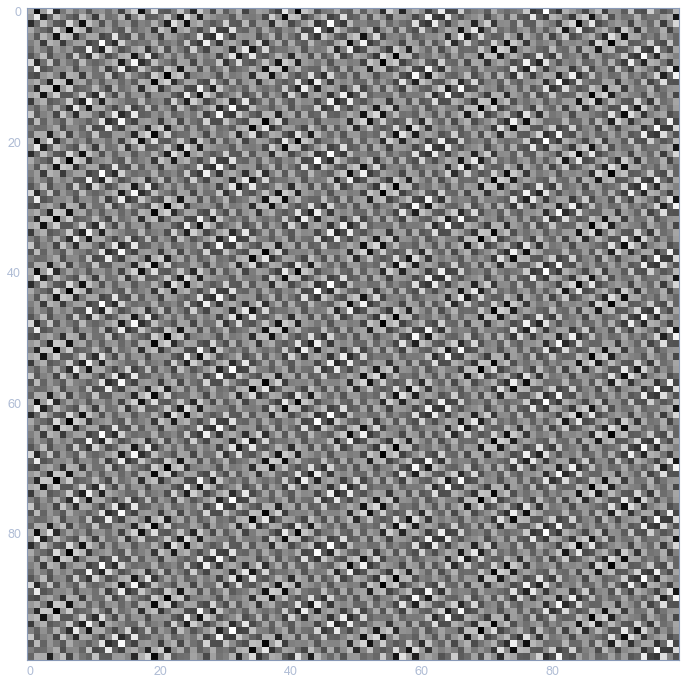

In [22]:
img_back = cv2.idft(np.fft.ifftshift(img_magnitude))
plt.imshow(img_back, cmap='gray');

# Questão 6

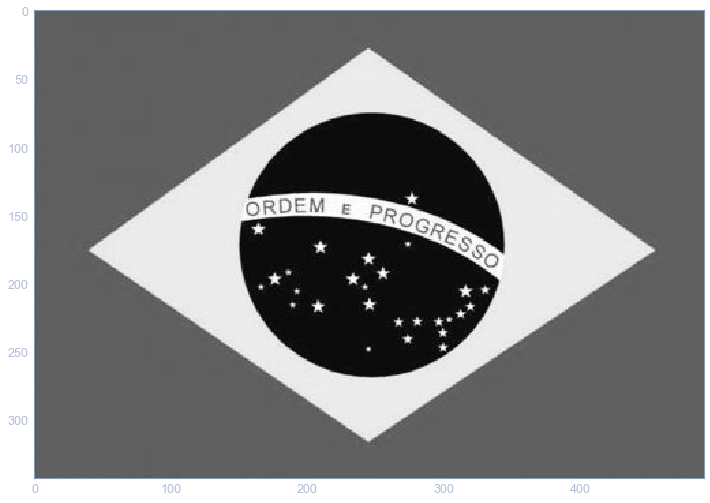

In [23]:
img_6 = cv2.imread('exercicio/6.jpeg')
plt.imshow(img_6);

In [24]:
img_6.shape

(343, 491, 3)

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
 [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63]
 [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
 [144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175]
 [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191]
 [192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207]
 [208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223]
 [224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 

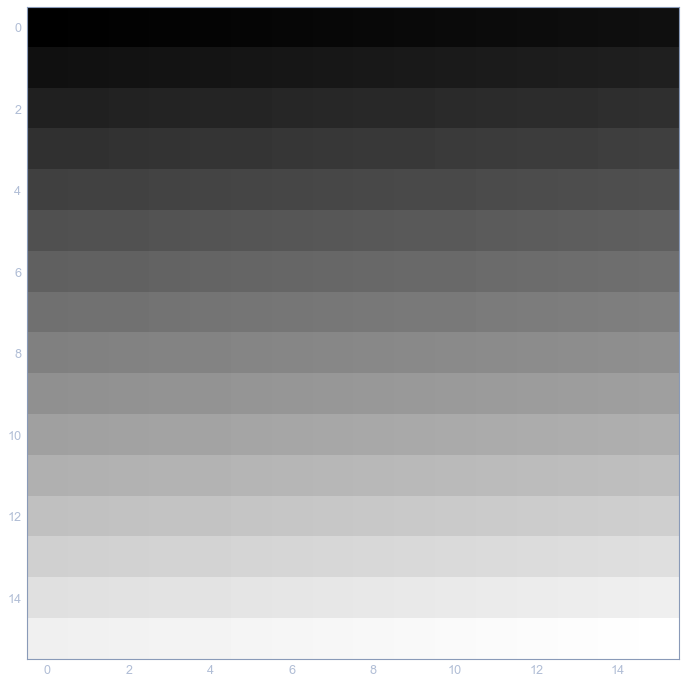

In [25]:
print(np.unique(img_6).reshape(16, 16))
plt.imshow(np.unique(img_6).reshape(16, 16));

In [26]:
cv2.imshow('bandeira', img_6)
cv2.waitKey(0)
cv2.destroyAllWindows()

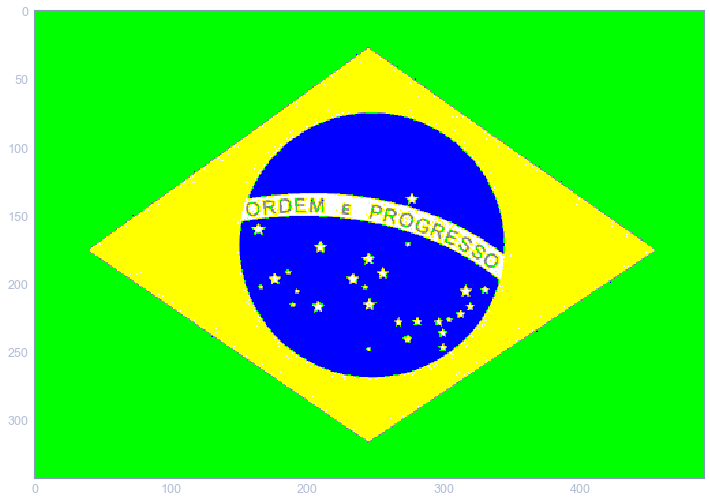

In [27]:
green = (img_6 >= [80,80,80]).all(axis=2) & (img_6 < [110,110,110]).all(axis=2)
img_6[np.where(green)] = [0, 255, 0]

yellow = (img_6 >= [180,180,180]).all(axis=2) & (img_6 < [240,240,240]).all(axis=2)
img_6[np.where(yellow)] = [255, 255, 0]

blue = ((img_6 >= [0,0,0]).all(axis=2) & (img_6 < [80,80,80]).all(axis=2))
img_6[np.where(blue)] = [0, 0, 255]

white = (img_6 > [240,240,240]).all(axis=2)
img_6[np.where(white)] = [255, 255, 255]

letters = ((img_6 >= [110,110,110]).all(axis=2) & (img_6 < [120,120,120]).all(axis=2))
img_6[np.where(letters)] = [0, 255, 0]

plt.imshow(img_6);